# Exercício 2 - Machine Learning 

In [53]:
#importando as bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Carregando arquivo

dados= pd.read_csv('./Arquivos/advertising.csv')

#Extraindo informações do Data Frame
dados.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [54]:
dados.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [55]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [56]:
dados.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [57]:
#Verificando se há algum valor nulo 
dados.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

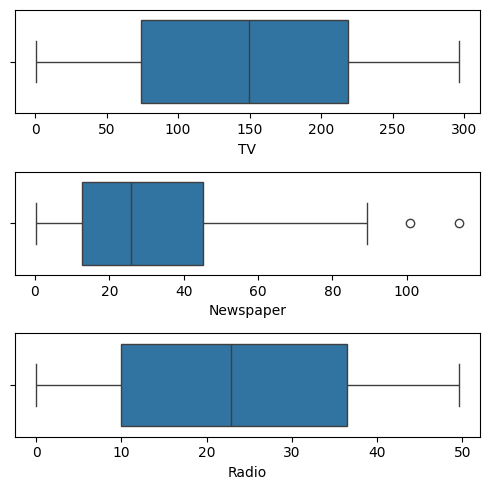

In [58]:
#Outlier Analysis


fig,axs= plt.subplots(3,figsize=(5,5))

plt1= sns.boxplot(dados['TV'], ax= axs[0],orient='h')
plt2= sns.boxplot(dados['Newspaper'], ax= axs[1],orient='h')
plt3= sns.boxplot(dados['Radio'], ax= axs[2],orient='h')

plt.tight_layout()

#Não há uma qtde considerável de outliers

Text(0.5, 1.0, 'Faturamento TV')

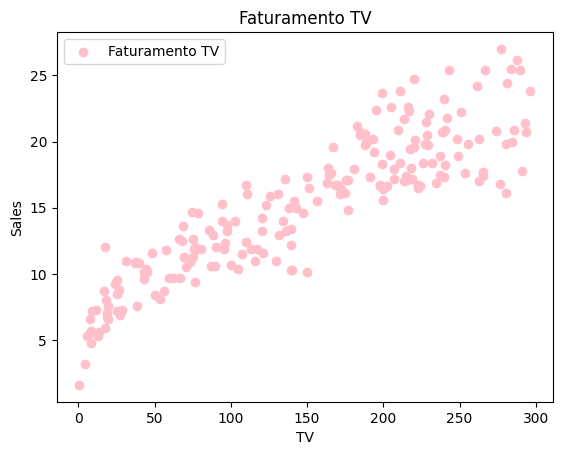

In [59]:
#Criando gráficos de dispersão- TV:

plt.scatter(
            data= dados,
            x='TV',
            y='Sales',
            label= 'Faturamento TV',
            color= 'pink'
            )

plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.title('Faturamento TV')


Text(0.5, 1.0, 'Faturamento Newspaper')

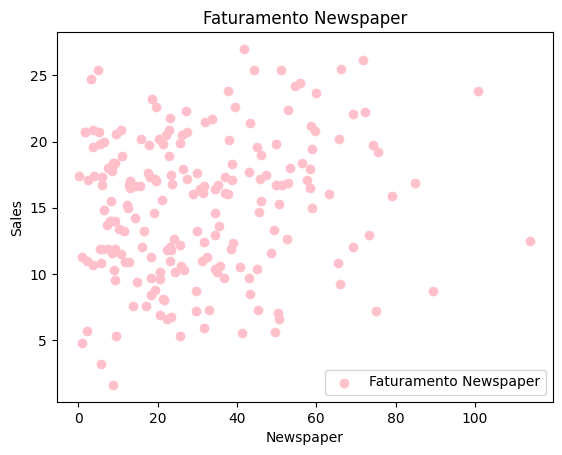

In [60]:
#Criando gráficos de dispersão- Newspapper:

plt.scatter(
            data= dados,
            x='Newspaper',
            y='Sales',
            label= 'Faturamento Newspaper',
            color= 'pink'
            )

plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.title('Faturamento Newspaper')

Text(0.5, 1.0, 'Faturamento Radio')

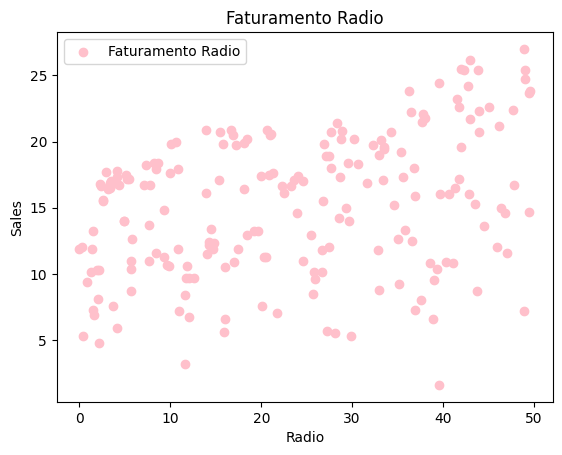

In [61]:
#Criando gráficos de dispersão- Radio:

plt.scatter(
            data= dados,
            x='Radio',
            y='Sales',
            label= 'Faturamento Radio',
            color= 'pink'
            )

plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.title('Faturamento Radio')

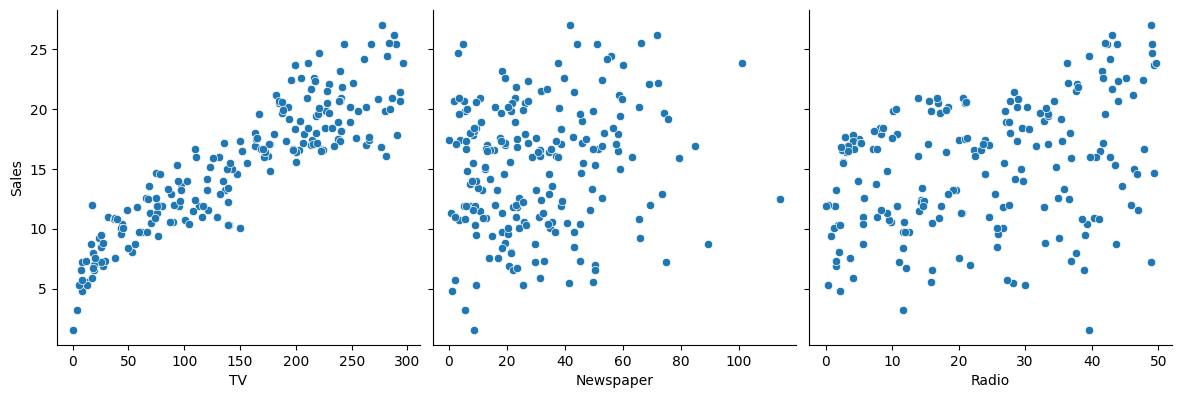

In [64]:
sns.pairplot(dados,
             x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',
            height=4, 
            aspect=1, 
            kind='scatter')

# Calculando o coeficiente de correlação

In [ ]:
dados.corr()

#TV possui maior correlação

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

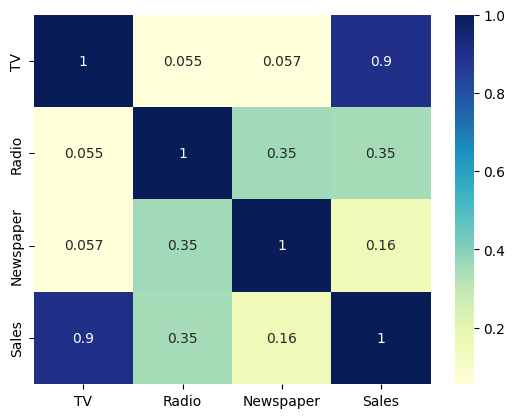

In [ ]:
#Gráfico de calor 

sns.heatmap(dados.corr(),cmap= 'YlGnBu', annot=True)

### Preparando os dados

In [ ]:
#Separando as variáveis

x= dados['TV']
y= dados['Sales']

#Verificando o tipo de dado e qtde de elementos
print(f'O tipo de dado da variável X é {type(x)}')
print(f'A quantidade de dados da variável X é {len(x)}')

O tipo de dado da variável X é <class 'pandas.core.series.Series'>
A quantidade de dados da variável X é 200


In [ ]:
x=np.array(x)

x=x.reshape(-1,1)
#x

In [ ]:
#Separação dos dados em treino e teste
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                   test_size= 0.30,
                                                   random_state=0
                                                   )

print('Qtde de elementos para treino:', len(x_train))

print('Qtde de elementos para teste:', len(x_test))

print('Qtde de elementos total:', len(x))

Qtde de elementos para treino: 140
Qtde de elementos para teste: 60
Qtde de elementos total: 200


In [ ]:
#Treinando o modelo

modelo= LinearRegression()

modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Exibir os coeficientes

print('Coeficiente angular (a):', round(modelo.coef_[0],5))
print('Coeficiente linear (b):', round(modelo.intercept_,5))

Coeficiente angular (a): 0.05473
Coeficiente linear (b): 7.14382


In [ ]:
#INSERIR OD VALORES PARA PREVISÃO 

entrada= int(input('Digite a quantidade de vendas para TV:'))
vendastv= np.array([[entrada]])

#np.array[[50]]

#Realizar previsão 
salario= modelo.predict(vendastv)

#Resultado 
print(f'Para {vendastv[0][0]} Televisões vendidas ' +
      f'o faturamento é de: {round(salario[0],2)}'
      )


Para 10 Televisões vendidas o faturamento é de: 7.69


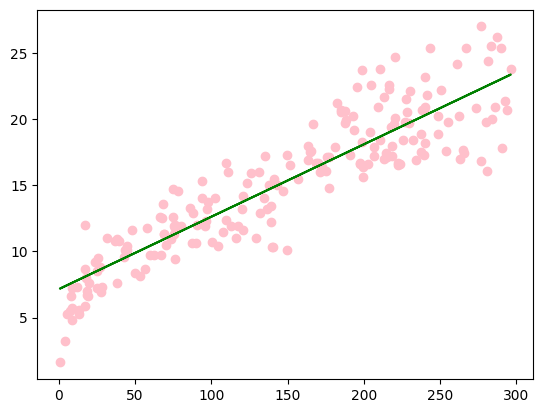

In [67]:
plt.scatter(x,y,color='pink')
plt.plot(x,modelo.predict(x),color='green')